# Práctica 3: Aprendizaje automático supervisado

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre un conjuntos de datos y aprender a interpretar los resultados obtenidos.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

##Número de grupo: 4

##Nombres de los estudiantes: Mario Calvarro Marines y Beñat Perez de Arenaza Eizaugirre

# Apartado 2: Clasificación

In [169]:
RANDOM_STATE=333

## 1) Carga del conjunto de datos

---



En este notebook trabajaremos con un conjunto de datos con diferentes características médicas de personas. El objetivo es establecer un diagnóstico sobre si tiene una enfermedad cardiovacular o no.

Crea un dataframe a partir del fichero `heart_failure.csv` que se proporciona junto con la práctica. Antes de nada, elimina las filas con valores nulos.



In [170]:
# acceso a google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [171]:
import pandas as pd
import seaborn as sns

df1 = pd.read_csv('/content/drive/MyDrive/heart_failure.csv')
df = df1[(df1['Cholesterol'] > 0) & (df1['RestingBP'] > 0)]
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.




Cuando las clases están equilibradas hay aproximadamente la misma cantidad de muestras para cada clase del conjunto de datos. Esto resulta beneficioso para el modelo, ya que se evita el sesgo hacia una clase en particular. Por tanto, los modelos tienden a aprender de manera más justa, permite generalizar de mejor manera y las métricas de evaluación son más representativas.

En cambio, cuando las clases no están equilibradas, es decir, cuando no hay una cantidad parecida de representantes para cada clase del conjunto de datos, sucede lo contrario de lo que acabamos de comentar. Es decir, puede haber sesgos hacia ciertas clases lo cual dificulta el aprendizaje de patrones de clases más minoritarias. Pese a que esto lleve a una precisión global alta, el recall es bajo en las clases minoritarias.

Para analizar si las clases a predecir están equilibradas, veamos si la cantidad de cada tipo es más o menos uniforme:


In [172]:
distribucionSex = df['Sex'].value_counts()
print("Distribución de clase Sex:")
print(distribucionSex)
print('\n')

distribucionChestPainType = df['ChestPainType'].value_counts()
print("Distribución de clase ChestPainType:")
print(distribucionChestPainType)
print('\n')

distribucionFastingBS= df['FastingBS'].value_counts()
print("Distribución de clase FastingBS:")
print(distribucionFastingBS)
print('\n')

distribucionRestingECG = df['RestingECG'].value_counts()
print("Distribución de clase RestingECG:")
print(distribucionRestingECG)
print('\n')

distribucionExerciseAngina = df['ExerciseAngina'].value_counts()
print("Distribución de clase ExerciseAngina:")
print(distribucionExerciseAngina)
print('\n')

distribucionST_Slope = df['ST_Slope'].value_counts()
print("Distribución de clase ST_Slope:")
print(distribucionST_Slope)
print('\n')

distribucionHeartDisease = df['HeartDisease'].value_counts()
print("Distribución de clase HeartDisease:")
print(distribucionHeartDisease)
print('\n')

Distribución de clase Sex:
Sex
M    564
F    182
Name: count, dtype: int64


Distribución de clase ChestPainType:
ChestPainType
ASY    370
NAP    169
ATA    166
TA      41
Name: count, dtype: int64


Distribución de clase FastingBS:
FastingBS
0    621
1    125
Name: count, dtype: int64


Distribución de clase RestingECG:
RestingECG
Normal    445
LVH       176
ST        125
Name: count, dtype: int64


Distribución de clase ExerciseAngina:
ExerciseAngina
N    459
Y    287
Name: count, dtype: int64


Distribución de clase ST_Slope:
ST_Slope
Flat    354
Up      349
Down     43
Name: count, dtype: int64


Distribución de clase HeartDisease:
HeartDisease
0    390
1    356
Name: count, dtype: int64




Como podemos apreciar,  ninguna de las variables categorias excepto en HeartDisease está muy equilibrada, ya que existe una diferencia grande entre la cantidad de representantes de cada clase. No obstante, en la variable HeartDisease podemos apreciar que está más equilibrada.

Dado que en general las clases no están muy equilibradas, debemos tener en cuenta que el modelo puede tener ciertos sesgos hacia aquellas clases más representadas y debemos tener cuidado con las conclusiones que saquemos de las clases minoritarias. Sin embargo, como la clase que queremos predecir es justamente la que está equilibrada, sí que podremos decir que el moderlo será fidedigno.

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [173]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,746.0,52.882038,9.505888,28.0,46.00,54.0,59.0,77.0
RestingBP,746.0,133.022788,17.282750,92.0,120.00,130.0,140.0,200.0
Cholesterol,746.0,244.635389,59.153524,85.0,207.25,237.0,275.0,603.0
FastingBS,746.0,0.167560,0.373726,0.0,0.00,0.0,0.0,1.0
MaxHR,746.0,140.226542,24.524107,69.0,122.00,140.0,160.0,202.0
Oldpeak,746.0,0.901609,1.072861,-0.1,0.00,0.5,1.5,6.2
HeartDisease,746.0,0.477212,0.499816,0.0,0.00,0.0,1.0,1.0


<Axes: ylabel='Density'>

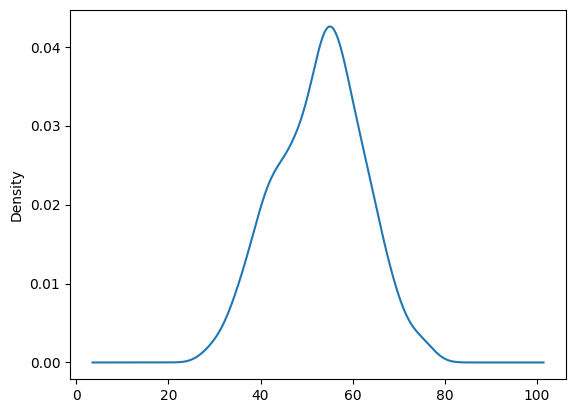

In [174]:
df["Age"].plot(kind="density", label ="Age")

<Axes: ylabel='Density'>

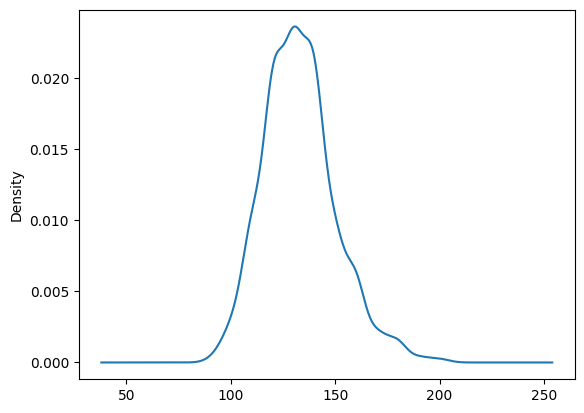

In [175]:
df["RestingBP"].plot(kind="density", label ="RestingBP")

<Axes: ylabel='Density'>

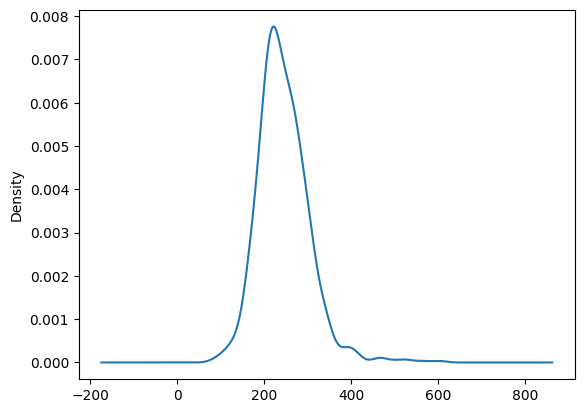

In [176]:
df["Cholesterol"].plot(kind="density", label ="Cholesterol")

<Axes: xlabel='FastingBS'>

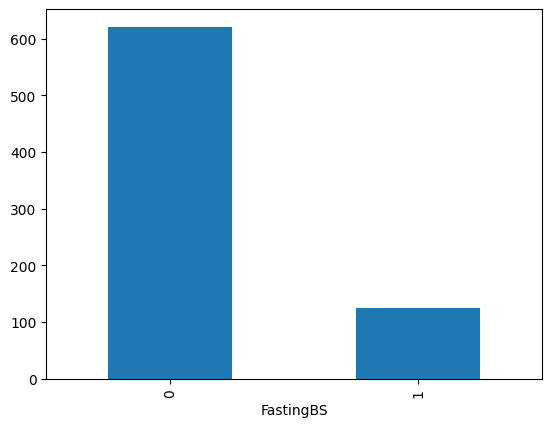

In [177]:
df['FastingBS'].value_counts().plot.bar()

<Axes: ylabel='Density'>

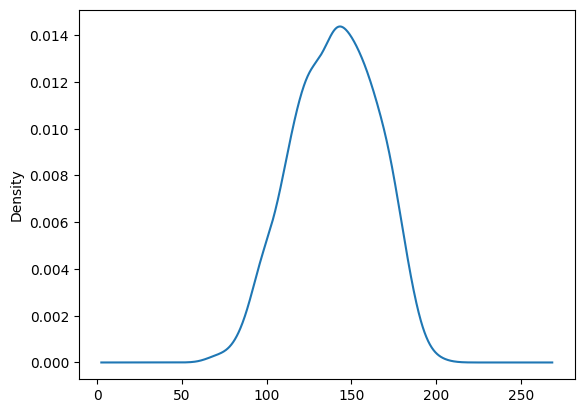

In [178]:
df["MaxHR"].plot(kind="density")

<Axes: ylabel='Density'>

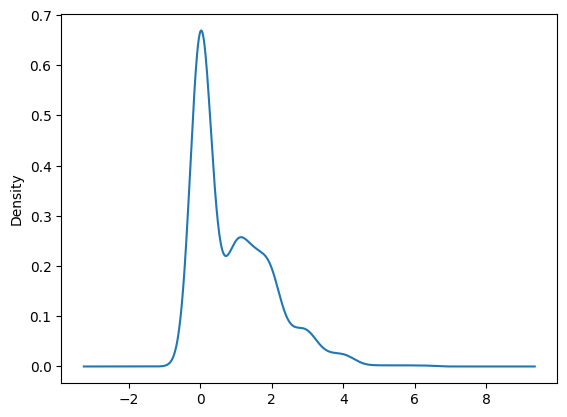

In [179]:
df["Oldpeak"].plot(kind="density")

<Axes: xlabel='HeartDisease'>

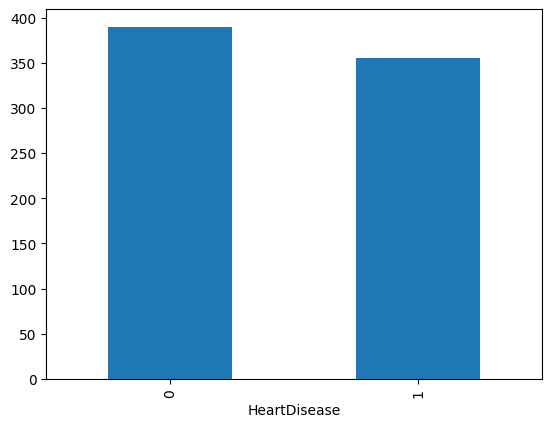

In [180]:
df['HeartDisease'].value_counts().plot.bar()

En general, todas las variables siguen una distribución semejante a la normal, aunque claramente, tienen ciertas diferencias. Además, cabe destacar que las variables Olpdeak y FastingBS solo toman dos valores númericos, por lo que se podría interpretar como categóricos.

Veamos cómo queda el grafico de dispersion de las variables númericas sin tener en cuenta las dos recién mencionadas.


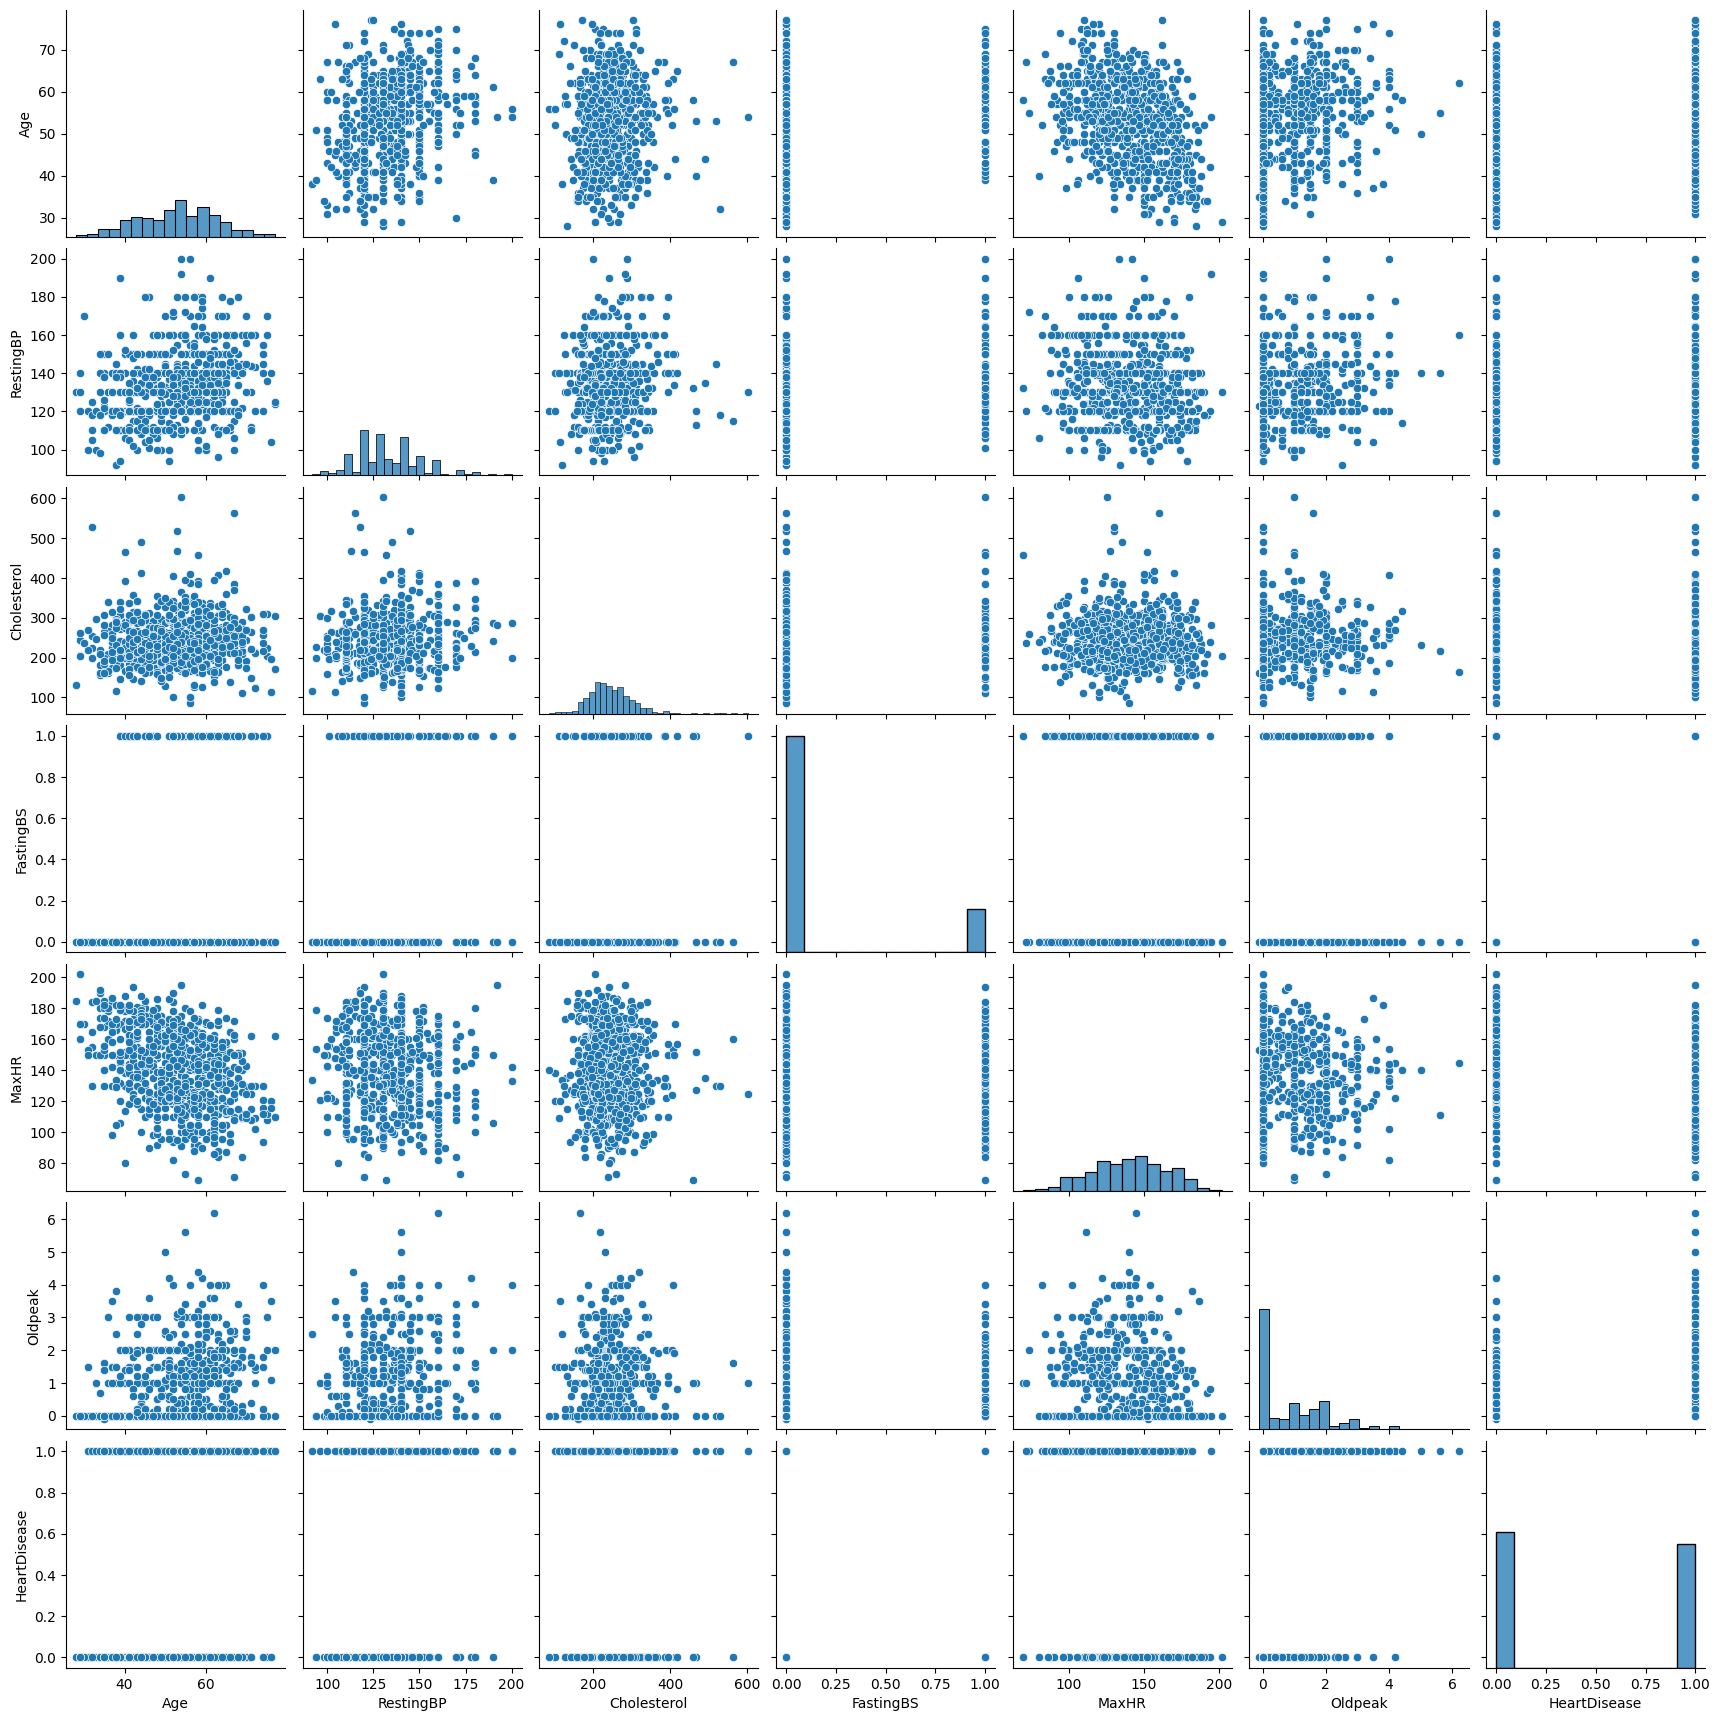

In [181]:
df1= df.drop(columns=df.select_dtypes(include=['object']).columns)

sns.pairplot(df1.drop(columns=df1.select_dtypes(include=['object']).columns))

Para comenzar, calculemos la matriz de correlación de las variables para decidir qué pares de variables serán interesantes de comparar. Si dos variables tienen una correlación baja en valor absoluto, no tendrá mucho interés compararlas, ya que probablemente no podramos sacar nada en claro de ello. No obstante, si la correlación es alta, entonces la comparación podrá llevarnos a inferir ciertas conclusiones.

In [182]:
df1.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.259865,0.058758,0.241338,-0.382112,0.286006,0.298617
RestingBP,0.259865,1.000000,0.095939,0.173765,-0.125774,0.198575,0.173242
Cholesterol,0.058758,0.095939,1.000000,0.054012,-0.019856,0.058488,0.103866
FastingBS,0.241338,0.173765,0.054012,1.000000,-0.102710,0.055568,0.160594
MaxHR,-0.382112,-0.125774,-0.019856,-0.102710,1.000000,-0.259533,-0.377212
Oldpeak,0.286006,0.198575,0.058488,0.055568,-0.259533,1.000000,0.495696
HeartDisease,0.298617,0.173242,0.103866,0.160594,-0.377212,0.495696,1.000000


Como podemos ver, realmente no hay ninguna relación que tenga una correlación mayor a 0.5 en valor absoluto. Por tanto, a priori, todas las variables nos están aportando distinta información y no hay ninguna redundante de la cual se pueda prescindir.

### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.


Como ya hemos mencionado anteriormente, la mayoria de variables no están equilibradas, por lo que podemos encontrar una disparidad en la frecuencia de cada clase de las variables categóricas.


<Axes: xlabel='Sex'>

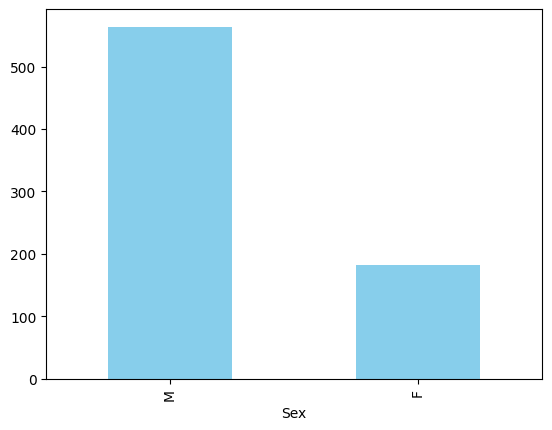

In [183]:
df['Sex'].value_counts().plot(kind='bar', color='skyblue')

Podemos apreciar que en la muestra hay una gran mayoría de hombres, lo cual podría hacer que los resultados salieran sesgados a favor de ellos y que, por ende, no fuera tan efectivo para el caso de las mujeres.

<Axes: xlabel='ChestPainType'>

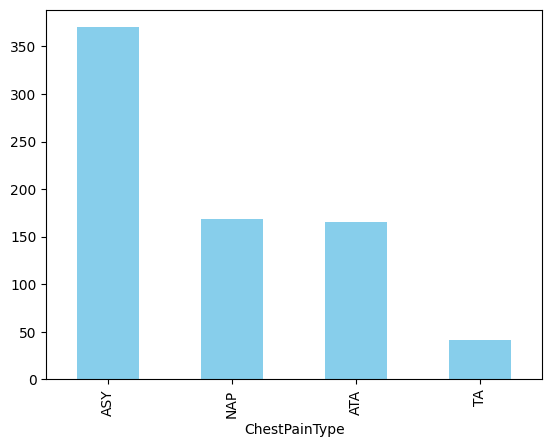

In [184]:
df['ChestPainType'].value_counts().plot(kind='bar', color='skyblue')

En cuanto al tipo de dolor en el pecho, podemos apreciar que hay uno sobrerepresentado, mientras que hay otro que aparece muy pocas veces. Además, hay otros dos que aparecen en una frecuencia media.

<Axes: xlabel='RestingECG'>

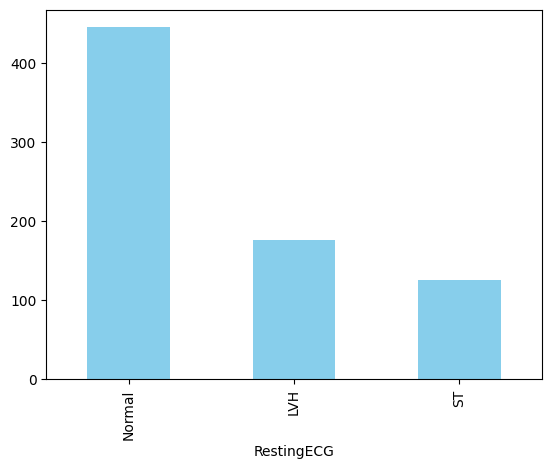

In [185]:
df['RestingECG'].value_counts().plot(kind='bar', color='skyblue')

En cuanto al electrocardiograma en reposo, es evidente que la mayoría entran dentro de lo normal, mientras que hay un grupo considerable que padece de hipertrofia ventricular izquierda y unos pocos que paceden de alteraciones en el segmento ST.

<Axes: xlabel='ExerciseAngina'>

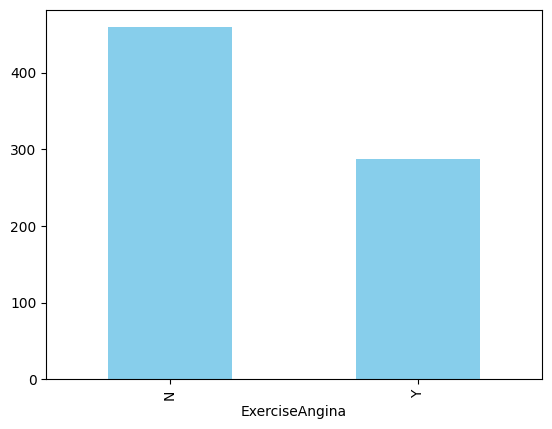

In [186]:
df['ExerciseAngina'].value_counts().plot(kind='bar', color='skyblue')

Por otro lado, tenemos más individuos que no padecen de anginas que aquellos que sí, aunque estos últimos forman una cantidad considerable de la muestra.

<Axes: xlabel='ST_Slope'>

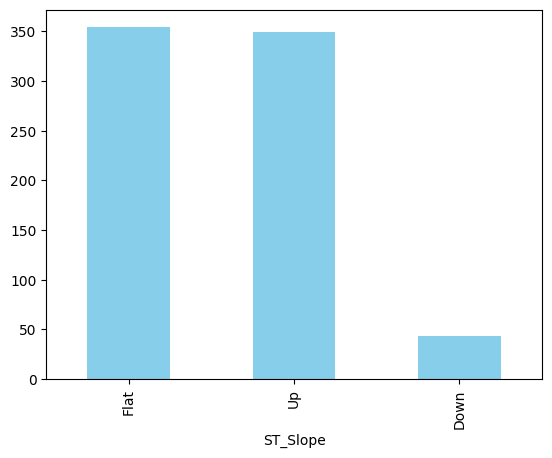

In [187]:
df['ST_Slope'].value_counts().plot(kind='bar', color='skyblue')

Sobre la pendiente del segmento ST, podemos apreciar que aquellos que tienen una pendiente nula o una elevación son la mayoría, mientras que quienes padecen de depresión son muy pocos.

## 3) Separa los datos en entrenamiento y test

Ajusta cada modelo de aprendizaje con los datos de entrenamiento y da una evaluación final con los datos de test.


In [188]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [189]:
# Codificar características categóricas usando one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Sex','ST_Slope', 'ExerciseAngina', 'RestingECG', 'ChestPainType' ])

# Dividir los datos en características (X) y etiquetas (y)
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

## 4) Árboles de decisión

Aplica árboles de decisión para resolver el problema.


### 4.1) Preprocesamiento de los datos

Decide si es conveniente preprocesar los datos de alguna manera. Justifica tu respuesta.

Hemos decidido eliminar de la muestra aquellos individuos con 'cholesterol' = 0 y 'RestingBP' = 0. Además, debemos transformar los los datos categóricos en numéricos (por ejemplo, a través de One-Enconding) ya que así lo requieren los árboles de decisión. Más allá de eso, no vemos la necesidad de más preprocesamiento ya que los árboles de decisión no necesitan reescalado.

### 4.2) Optimizando el número mínimo de ejemplos para dividir un nodo

En este apartado vamos a entrenar nuestro clasificador e intentar dar con una parametrización que aprenda "lo justo", sin quedarse corto, ni sobreaprender.

Para ello, probaremos distintos árboles variando la profundidad máxima y usando validación cruzada en 10 partes.

Pinta las curvas de apredizaje para distintos valores de dicho parámetro en entrenamiento y validación. Analiza e interpreta las curvas (¿qué puedes decir de cómo varía el comportamiento de clasificador en entrenamiento y validación a medida que cambia el valor del parámetro?) y decide de manera razonada qué valor del parámetro es el que consideras más adecuado.

Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.


In [190]:
# Crear y entrenar el clasificador de árbol de decisiones
clf = DecisionTreeClassifier(criterion="entropy", random_state=RANDOM_STATE)
clf.fit(X_train, y_train)

# Calcular la precisión del modelo de entrenamiento y prueba
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

train_accuracy, test_accuracy

(1.0, 0.7767857142857143)



Podemos observar como el árbol clasifica perfectamente el conjunto de entrenamiento pero no lo hace tan bien con el conjunto de test. Parece que nuestro modelo ha sobreaprendido.

Si queremos tener unos valores más confiables del error podemos utilizar validación cruzada. Aunque la validación cruzada es mucho más costosa computacionalmente, en este caso no notaremos la diferencia porque el conjunto de datos es muy pequeño.


In [191]:
from sklearn.model_selection import cross_validate
import numpy as np

RANDOM_STATE = 333

# Creamos y entrenamos el árbol de decisión con los parámetros por defecto
clf = DecisionTreeClassifier(criterion="entropy", random_state=RANDOM_STATE)

# Validación cruzada dividiendo el conjunto de datos en 10 partes (folds)
scores = cross_validate(clf, X_train, y_train, scoring='accuracy',
                        cv=10, return_train_score=True)

# scores es un diccionario con datos sobre tiempos y exactitud (accuracy)
train_accuracy = np.mean(scores['train_score'])
test_accuracy = np.mean(scores['test_score'])
train_accuracy, test_accuracy

(1.0, 0.8142597968069667)

Podemos ver como, en realidad, el árbol se comporta un poco peor de lo que parecía con la partición simple. Tenemos un 78.92% de exactitud (accuracy) en el conjunto de test, lo cual no es una exactitud deseable. Por tanto, veamos las modificaciones que podemos hacer para mejorarla.

In [192]:
train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1, 10)
for md in max_depths:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2, random_state=RANDOM_STATE)
    scores = cross_validate(clf, X_train, y_train, scoring='accuracy', cv=10, return_train_score=True)

    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))

train_accuracy, test_accuracy

([0.8333330308941613,
  0.8333330308941613,
  0.8812285079163453,
  0.8995322778206234,
  0.9227355623100305,
  0.9457233588894434,
  0.9661579639794947,
  0.9780792088191264,
  0.9870167400081659],
 [0.8333091436865022,
  0.8333091436865022,
  0.8603410740203193,
  0.8584905660377359,
  0.8353410740203193,
  0.8220246734397678,
  0.8220246734397678,
  0.8296444121915819,
  0.8142597968069666])

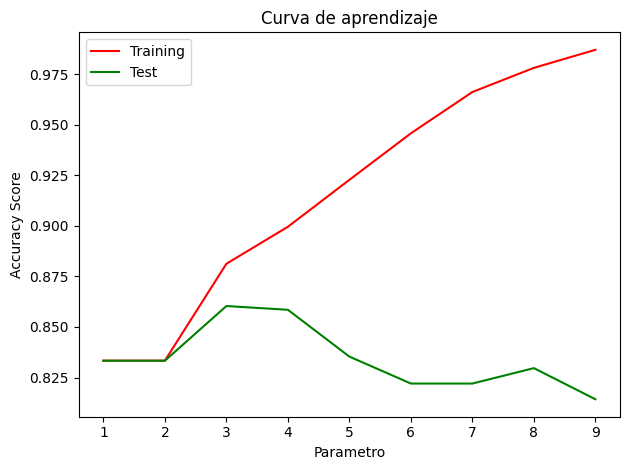

In [193]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Para max_depth=3 obtenemos el mejor valor de exactitud para el conjunto de test. A partir de esa profundidad la métrica mejora para el conjunto de entrenamiento y empeora para el conjunto de test indicando que el clasificador está sobreentrenado y generaliza peor. Podemos apreciar que, al principio, no mejora nada al pasar de 1 a 2, pero a partir de 2, No obstante, 3 es el punto a partir del cual la exactitud del test empieza a caer, pese a que el del entrenamiento siga subiendo.

Veamos una representación visual del árbol que sale con esta profundidad máxima.

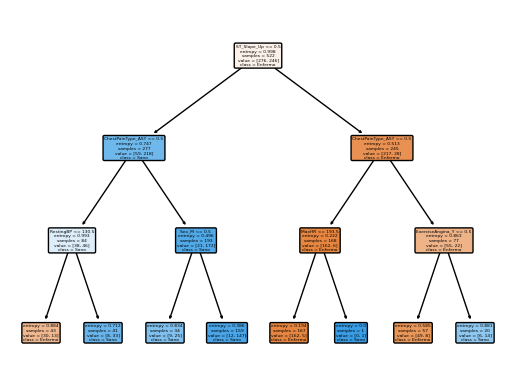

In [194]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pintamos el árbol
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names = ['Enfermo', 'Sano'] , rounded=True)
plt.show()

### 4.3) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

#### Métricas detalladas por clase

**Detalle importante sobre los dataset**:

Para realizar la primera evaluación de todos los modelos usaremos el subconjunto de entrenamiento. Una vez que tengamos todos los modelos con los parámetros adecuados, usaremos el subconjunto de test para compararlos.

Primero vamos a calcular las métricas detalladas agregadas.

In [195]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted', 'f1_weighted']

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, X_train, y_train, scoring=scoring_metrics,
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ', np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ', np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ', np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8653268438272491
Exhaustividad ponderada media:  0.8603410740203193
F1 ponderado media:  0.8599619266189574


Tanto la precisión, el recall y el f1-score son ciertamente altos, lo cual quiere decir que cuando predecimos que un paciente tiene riesgo de tener una enfermedad del corazón, en un gran porcentaje de casos lo va a acertar. No obstante, en un ámbito como es el de la salud, creemos que dicha efectividad debería ser mayor puesto que se trata de un tema trascendental. Por tanto, y sin antes haber visto los resultados obtenidos mediante otros métodos, creemos que deberíamos intentar mejorar la efectividad.

A continuación calculamos las métricas detalladas por clase.

In [196]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, X_train, y_train, cv=10)

# Informe por clases
cr = classification_report(y_train, predictions, target_names = ['0','1'])
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       276
           1       0.84      0.87      0.85       246

    accuracy                           0.86       522
   macro avg       0.86      0.86      0.86       522
weighted avg       0.86      0.86      0.86       522



En cuanto a las métricas detalladas por clase, como hemos anticipado anteriormente, tiene una tasa de acierto relativamente alta en general. Los verdaderamente positivos/negativos que se predicen como tal tienen un alto porcentaje de acierto. No obstante, en el caso de las clases de los falsos positivos y los falsos negativos, existe una proporción que, pese a ser reducida, al tratarse de un tema tan importante resulta incluso elevada.

Vamos a pintar la matriz de confusión.

In [197]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[234  42]
 [ 31 215]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

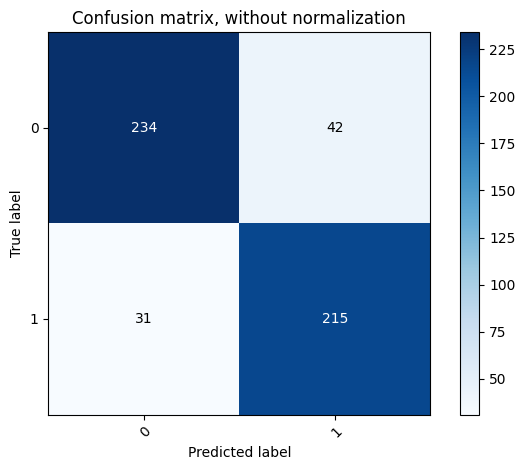

In [198]:
# El parámetro normalize permite mostrar los porcentajes en lugar del número de instancias
plot_confusion_matrix(y_train, predictions, [0,1], normalize=False)

En general, consigue predecir de forma ciertamente correcta. Además, permite una fácil interpretación de los datos y no es costoso computacionalmente. Además, no exige reescalar los datos. No obstante, no creemos que sea la mejor opción ya que no tiene una precisión suficientemente alta para el tema que está tratando. Además, puede resultar ciertamente sesgado hacia clases dominantes.

## 5) Resuelve el mismo problema usando un clasificador k-NN

Busca el valor óptimo para el número de vecinos

### 5.1) Preprocesamiento de los datos
De nuevo, hemos eliminado de la muestra aquellos individuos con 'cholesterol' = 0 y 'RestingBP' = 0. Además, debemos transformar los datos categóricos en numéricos y normalizar la muestra. Para realizar la comparación final entre los modelos debemos asegurarnos que la división del dataset sea igual a la anterior. Por tanto, simplemente es necesario normalizar la división.

In [199]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_nor = scaler.fit_transform(X_train)
X_test_nor = scaler.fit_transform(X_test)

### 5.2) Optimizando el número vecinos

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Creamos el clasificador k-NN
# Podemos fijar los pesos como 'uniform' o inv. proporcionales a la distancia 'distance'
clf = KNeighborsClassifier(weights='distance')

# Entrenar el clasificador
clf.fit(X_train_nor, y_train)

# Medir la tasa de aciertos o exactitud (accuracy) en los conjuntos de entrenamiento y test
train_accuracy = clf.score(X_train_nor, y_train)
test_accuracy = clf.score(X_test_nor, y_test)

train_accuracy, test_accuracy

(1.0, 0.8526785714285714)

Con esto, el algoritmo consigue una precisión bastante alta para el conjunto de "test". Pero, de nuevo, utilizaremos validación cruzada para obtener valores más reales sobre su comportamiento.

In [201]:
# Validación cruzada dividiendo el conjunto de datos en 10 partes (folds)
scores = cross_validate(clf, X_train_nor, y_train, scoring='accuracy',
                        cv=10, return_train_score=True)

# scores es un diccionario con datos sobre tiempos y exactitud (accuracy)
train_accuracy = np.mean(scores['train_score'])
test_accuracy = np.mean(scores['test_score'])
train_accuracy, test_accuracy

(1.0, 0.8544629898403484)

Vemos que el valor dado por esta validación cruzada es ligeramente superior, pero tampoco ha habido un cambio muy grande. Para encontrar el valor óptimo probaremos con distintas posibilidades para el parámetro n_neighbors.

In [202]:
test_accuracy = []
test_std = []

# Entrenamos y validamos varios algoritmos con distinto número de vecinos
num_vec = range(1, 15)
for nv in num_vec:
    clf = KNeighborsClassifier(n_neighbors=nv, weights='distance')
    scores = cross_validate(clf, X_train_nor, y_train, scoring='accuracy', cv=10, return_train_score=True)

    test_accuracy.append(np.mean(scores['test_score']))
    test_std.append(np.std(scores['test_score']))

test_accuracy

[0.8296081277213354,
 0.8296081277213354,
 0.8352685050798259,
 0.8449201741654573,
 0.8544629898403484,
 0.8601596516690856,
 0.8755079825834542,
 0.8736211901306241,
 0.8717343976777938,
 0.879390420899855,
 0.8736574746008708,
 0.8755805515239476,
 0.8717706821480407,
 0.8679608127721335]

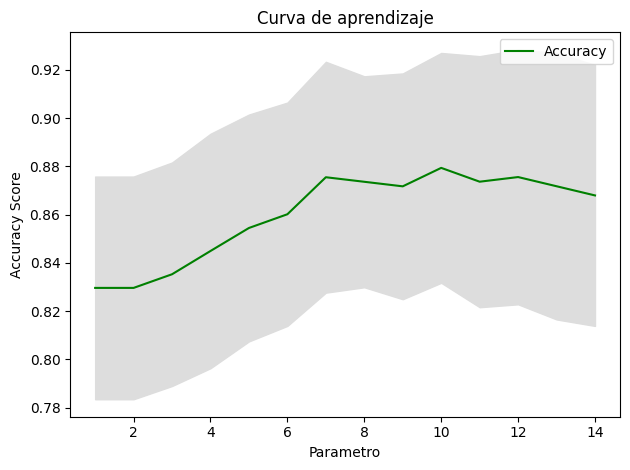

In [203]:
# Dibujamos la línea con la accuracy (exactitud) en el test
plt.plot(num_vec, test_accuracy, color="g", label="Accuracy")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(test_accuracy) - np.array(test_std)
upper_limit = np.array(test_accuracy) + np.array(test_std)
plt.fill_between(num_vec, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

En vista de esta gráfica del valor de la precisión parece que un valor oṕtimo es 10 ya que en ese punto se alcanza un máximo y, tras él, se estabiliza.

### 5.3) Estudiando el error
Empezaremos calculando, en base al valor del parámetro que hemos visto antes, la precisión, exhaustividad y el valor F1.

In [204]:
# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted', 'f1_weighted']

# Calculamos las métricas utilizando validación cruzada

clf_knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
scores = cross_validate(clf_knn, X_train_nor, y_train, scoring=scoring_metrics,
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ', np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ', np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ', np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8860144237601453
Exhaustividad ponderada media:  0.879390420899855
F1 ponderado media:  0.8790914946853944


Apreciamos que los valores de las tres métricas son altas (mejores que el anterior algoritmo) lo cuál nos indica que es bastante probable que el algoritmo acierte en el diagnóstico de un paciente. Sin embargo, de nuevo, al ser un ámbito tan sensible sería adecuado intentar mejorar estos resultados.

Y, ahora, por clase:

In [205]:
# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
predictions2 = cross_val_predict(clf_knn, X_train_nor, y_train, cv=10)

# Informe por clases
cr = classification_report(y_train, predictions2, target_names = ['0','1'])
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       276
           1       0.85      0.91      0.88       246

    accuracy                           0.88       522
   macro avg       0.88      0.88      0.88       522
weighted avg       0.88      0.88      0.88       522



Estas métricas nos indican que el modelo se comporta en precisión ligeramente mejor para el caso de los pacientes sanos, pero en recall para los enfermos. Sin embargo, en conjunto, tiene unos valores bastante aceptables. De nuevo, si no fuese un área tan sensible se podría usar este modelo de manera bastante segura.

Veamos ahora la matriz de confusión para este valor de 'k'.

Confusion matrix, without normalization
[[235  41]
 [ 22 224]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

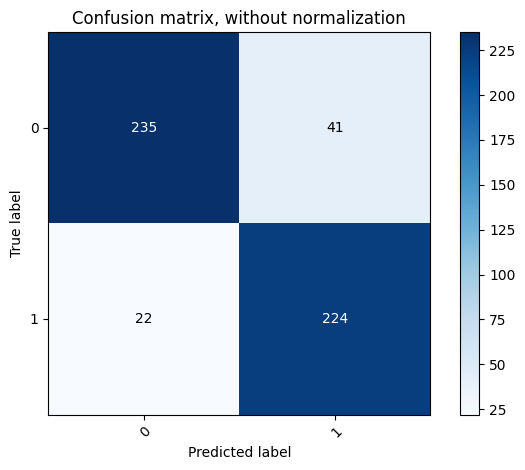

In [206]:
plot_confusion_matrix(y_train, predictions2, [0,1], normalize=False)

Con esto vemos que se ha mejorado ligeramente los resultados del anterior algoritmo, pero todavía no es del todo fiable.

Parece que este algoritmo tiene un comportamiento mejor que el anterior, pero es posible (depende del tamaño del dataset, en este caso al ser pequeño no importa demasiado) que este sea más costoso computacionalmente.

## 6) Resuelve el mismo problema usando un clasificador MLP

Optimiza el coeficiente de regularización


### 6.1) Preprocesamiento de los datos
Utilizaremos el mismo preprocesado que en el anterior dataset, es decir, eliminamos las filas con valores nulos, transformamos los datos categóricos en numéricos y normalizamos la muestra.

### 6.2) Optimizando el coeficiente de regularización
Como en el *notebook* de ejemplo, de todos los parámetros que presenta un MLP, tan solo intentaremos encontrar el valor óptimo del coeficiente de regularización. Para el resto de parámetros utilizaremos los siguientes valores:
100 neuronas, función de activación ReLU, tamaño de mini-batch 100, tasa de aprendizaje 0.001 y máximo de 500 iteraciones a los datos (epochs).

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.3, batch_size=100,
             learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)

# Entrenar el clasificador
mlp.fit(X_train_nor, y_train)


# Medir la tasa de aciertos o exactitud (accuracy) en los conjuntos de entrenamiento y test
train_accuracy = mlp.score(X_train_nor, y_train)
test_accuracy = mlp.score(X_test_nor, y_test)

train_accuracy, test_accuracy

(0.8946360153256705, 0.8571428571428571)

Ahora veremos una precisión más realista utilizando validación cruzada.

In [208]:
# Validación cruzada dividiendo el conjunto de datos en 10 partes (folds)
scores = cross_validate(mlp, X_train_nor, y_train, scoring='accuracy',
                        cv=10, return_train_score=True)

# scores es un diccionario con datos sobre tiempos y exactitud (accuracy)
train_accuracy = np.mean(scores['train_score'])
test_accuracy = np.mean(scores['test_score'])
train_accuracy, test_accuracy

(0.910389239214263, 0.8717343976777938)

Y utilizaremos esta validación cruzada sobre los datos de entrenamiento para decidir el valor del parámetro que queremos optimizar.

In [209]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
import numpy as np

test_accuracy_mean = []
test_accuracy_std = []

# Entrenar y validar distintas configuraciones
regul_param_range = np.arange(0.1, 2.1, step=0.2) # [0.5, 0.75,  ..., 2]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100,
             learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)

    scores = cross_validate(mlp, X_train_nor, y_train, scoring='accuracy', cv=10)

    test_accuracy_mean.append(np.mean(scores['test_score']))
    test_accuracy_std.append(np.std(scores['test_score']))

test_accuracy_mean, test_accuracy_std

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

([0.8717706821480407,
  0.8717343976777938,
  0.8793904208998548,
  0.877467343976778,
  0.879390420899855,
  0.8698838896952106,
  0.8736574746008708,
  0.8736937590711177,
  0.8775399129172714,
  0.8775399129172714],
 [0.051947197577272355,
  0.048374765450880264,
  0.05134456395610364,
  0.05147283028181525,
  0.05205985732677181,
  0.05634738742052281,
  0.052142134610258045,
  0.055321490930038034,
  0.0539239600954567,
  0.0539239600954567])

Veamos ahora estos resultados en una gráfica para decidir que valor tomar:

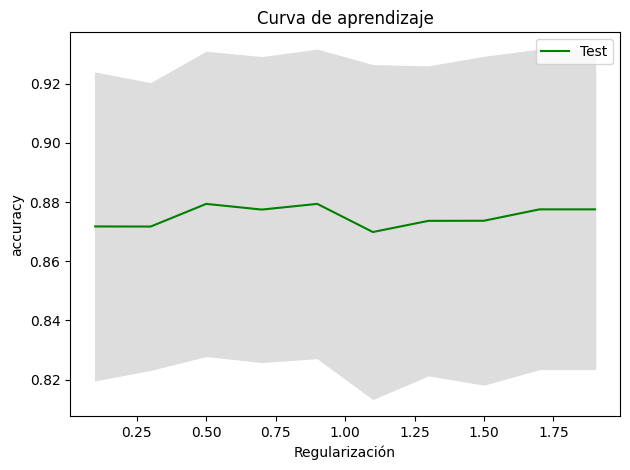

In [210]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(regul_param_range, test_accuracy_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(test_accuracy_mean) - np.array(test_accuracy_std)
upper_limit = np.array(test_accuracy_mean) + np.array(test_accuracy_std)
plt.fill_between(regul_param_range, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización"), plt.ylabel("accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Parece, en vista de estos resultados, que el mejor valor será 0.5.

In [211]:
mlp = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.5, batch_size=100,
             learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)

### 6.3) Estudiando el error
Utilizando ahora estos valores para los parámetros, estudiaremos para este algoritmo las métricas de precisión, exhaustividad y F1.

In [212]:
# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted', 'f1_weighted']


# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(mlp, X_train_nor, y_train, scoring=scoring_metrics,
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ', np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ', np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ', np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.885308453135824
Exhaustividad ponderada media:  0.8793904208998548
F1 ponderado media:  0.8791146649165279


Los valores dados por este algoritmo se encuentran muy cerca de los dados por los anteriores, pero el coste computacional es notablemente mayor.

Veamos ahora los resultados por clase.

In [213]:
predictions3 = cross_val_predict(mlp, X_train_nor, y_train, cv=10)

# Informe por clases
cr = classification_report(y_train, predictions3, target_names = ['0','1'])
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       276
           1       0.85      0.91      0.88       246

    accuracy                           0.88       522
   macro avg       0.88      0.88      0.88       522
weighted avg       0.88      0.88      0.88       522



En la línea similar a los anteriores algoritmos, la predicción que nos presenta este modelo es bastante buena, pero en un ámbito como el que es el de la salud, tal vez sería más seguro intentar utilizar otro método más confiable.

Por último, veamos la matriz de confusión:

Confusion matrix, without normalization
[[235  41]
 [ 22 224]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

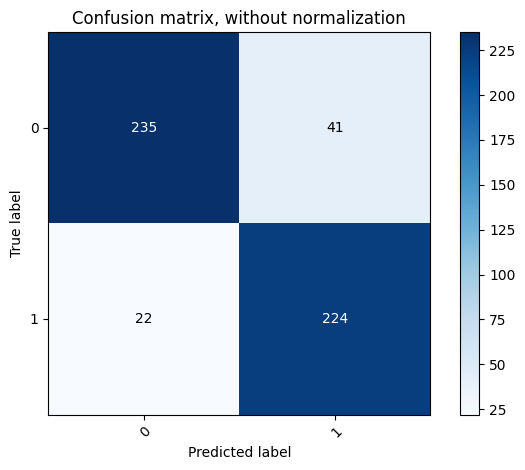

In [214]:
plot_confusion_matrix(y_train, predictions3, [0,1], normalize=False)

## 7) Comparación de resultados

Muestra los resultados en test de los mejores modelos.
Discute cual es el mejor.

En este apartado crearemos los mejores modelos de los anteriores apartados y los compararemos a través de la matriz de confusión, tras haberlos entrenado sobre el subconjunto *train*, con las predicciones sobre el conjunto *test* (que hasta este momento no había sido utilizado).

Recordamos que esto es una comparación correcta porque los datos normalizados vienen directamente de la división original.

Matriz confusión del árbol
Normalized confusion matrix
[[0.80701754 0.19298246]
 [0.21818182 0.78181818]]
Matriz confusión del knn
Normalized confusion matrix
[[0.85087719 0.14912281]
 [0.15454545 0.84545455]]
Matriz confusión del mlp
Normalized confusion matrix
[[0.87719298 0.12280702]
 [0.16363636 0.83636364]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

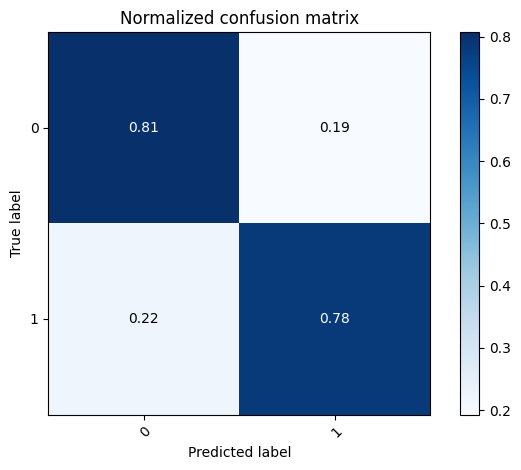

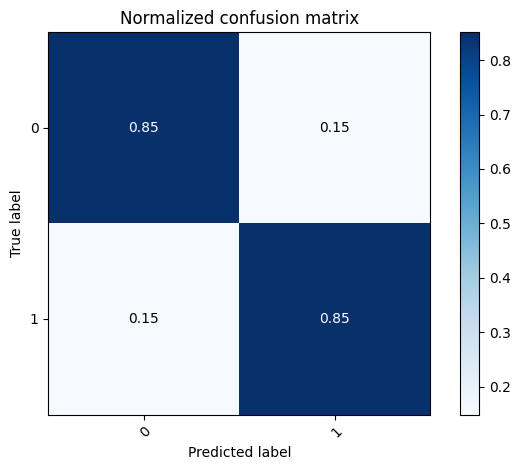

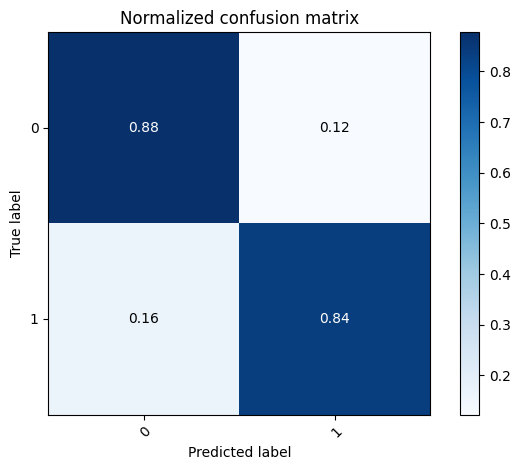

In [218]:
# Creamos los distintos modelos
clf_ar = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
clf_knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
mlp = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.3, batch_size=100,
             learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)

# Entrenamos los tres modelos seleccionados con el subconjunto de datos train
clf_ar.fit(X_train, y_train)
clf_knn.fit(X_train_nor, y_train)
mlp.fit(X_train_nor, y_train)


# Los evaluamos con el subconjunto de datos test
pred_ar = clf_ar.predict(X_test)
pred_knn = clf_knn.predict(X_test_nor)
pred_mlp = mlp.predict(X_test_nor)

print("Matriz confusión del árbol")
plot_confusion_matrix(y_test, pred_ar, [0,1], normalize=True)

print("Matriz confusión del knn")
plot_confusion_matrix(y_test, pred_knn, [0,1], normalize=True)

print("Matriz confusión del mlp")
plot_confusion_matrix(y_test, pred_mlp, [0,1], normalize=True)

Como hemos venido adelantado en los anteriores apartados, los tres modelos aportan unos resultados muy similares. Sin embargo, consideramos que el algoritmo KNN presenta los mejores resultados (aunque solo sea ligeramente), ya que son prácticamente iguales a los del MLP, pero con un rendimiento mucho mejor.

Todo esto se debe restringir a este caso puesto que el dataset no presenta una dimensionalidad demasiado alta y el número de datos tampoco es muy grande. Si todo esto no fuese así, es bastante probable que el MLP diese mejores resultados.